# Pymaceuticals Inc.

### Observations and Insights 

In this study, 249 mice identified with SCC tumor growth were treated through 10 different drug regimens. The distribution of gender in mice was almost the same and the range of data point for treatment was between 150 and 250.
Except Capomulin, the most promising treatment regimen was Ramicane. Ramicane had a similar effect as Capomulin in reducing the tumor volume. This study showed that the drug is more effective in mice of light weight through the correlation between mouse weight and the average tumor volume.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

#merge_df =merge_df["Mouse ID"]
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice in the DataFrame.
number_mice =len(merge_df["Mouse ID"].value_counts())
number_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = merge_df[merge_df.duplicated(['Mouse ID','Timepoint'])]
#print(duplicateRows["Mouse ID"])
duplicate_mice = duplicateRows.values[0,0]
duplicate_mice

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = merge_df.loc[merge_df["Mouse ID"]==duplicate_mice,:]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df[merge_df["Mouse ID"] != duplicate_mice]
clean_data.drop_duplicates(subset ="Mouse ID",keep ="first",inplace = True)
clean_data.head()

/Users/heesungshim/app/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.

new_number_of_mice = len(clean_data["Mouse ID"])
new_number_of_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen
regimen_group = merge_df.groupby(['Drug Regimen'])
regimen_group.count()
drug_list = list(regimen_group.count().index)
drug_mean_list=[]
drug_median_list=[]
drug_variance_list=[]
drug_std_list=[]
drug_sem_list=[]
for drug in drug_list:
    regimen_mean = merge_df.loc[merge_df["Drug Regimen"]==drug,["Tumor Volume (mm3)"]].mean()
    drug_mean_list.append(float(regimen_mean))
    regimen_median = merge_df.loc[merge_df["Drug Regimen"]==drug,["Tumor Volume (mm3)"]].median()
    drug_median_list.append(float(regimen_median))
    regimen_variance = merge_df.loc[merge_df["Drug Regimen"]==drug,["Tumor Volume (mm3)"]].var()
    drug_variance_list.append(float(regimen_variance))
    regimen_std = merge_df.loc[merge_df["Drug Regimen"]==drug,["Tumor Volume (mm3)"]].std()
    drug_std_list.append(float(regimen_std))
    regimen_sem = merge_df.loc[merge_df["Drug Regimen"]==drug,["Tumor Volume (mm3)"]].sem()
    drug_sem_list.append(float(regimen_sem))
drug_summary = {"Drug Regimen":drug_list,'Mean Tumor Volume':drug_mean_list,'Median Tumor Volume':drug_median_list,
            'Tumor Volume Variance':drug_variance_list,'Tumor Volume Std. Dev.':drug_std_list,
                    'Tumor Volume Std. Err.':drug_sem_list}
drug_summary_df = pd.DataFrame(drug_summary,columns=["Drug Regimen",'Mean Tumor Volume','Median Tumor Volume',
                                                    'Tumor Volume Variance','Tumor Volume Std. Dev.','Tumor Volume Std. Err.']) 
new_index_drug_summary_df =drug_summary_df.set_index("Drug Regimen")
new_index_drug_summary_df
    
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

<function matplotlib.pyplot.show(*args, **kw)>

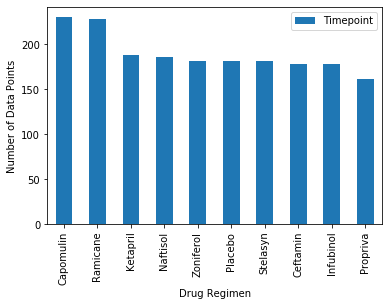

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
regimen_and_MouseID = merge_df[["Drug Regimen","Timepoint"]]
grouped_regimen =regimen_and_MouseID.groupby(["Drug Regimen"])
grouped_regimen=pd.DataFrame(grouped_regimen.count())
grouped_regimen=grouped_regimen.sort_values("Timepoint",ascending =False)
grouped_regimen

grouped_regimen.plot(kind="bar")
plt.ylabel("Number of Data Points")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

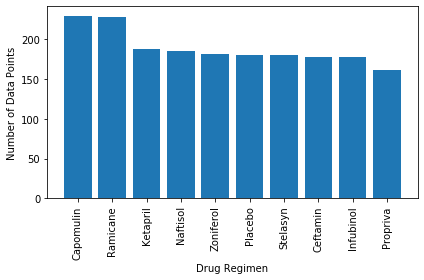

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis =list(grouped_regimen.index)
y_axis=list(grouped_regimen["Timepoint"])
tick_locations=[value for value in x_axis]
plt.bar(x_axis,y_axis,color="tab:blue",align="center")
plt.xticks(tick_locations,grouped_regimen.index,rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()
plt.show

## Pie Plots

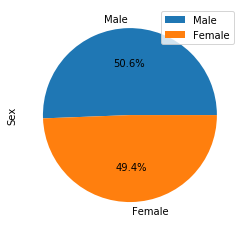

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merge_df["Sex"].value_counts()
sex_df = pd.DataFrame(merge_df["Sex"].value_counts())
sex_df
sex_df.plot.pie(y='Sex',autopct="%1.1f%%")
plt.show()

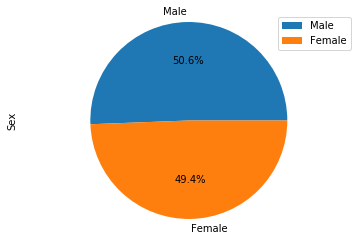

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=list(sex_df.index)
sizes=list(sex_df["Sex"])
colors =["tab:blue","tab:orange"]
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.legend() 
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
 
outlier_df = pd.DataFrame(merge_df,columns =["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"])
outlier_df.drop_duplicates(subset ="Mouse ID",keep ="last",inplace = True)
sort_outlier_df = outlier_df.sort_values(["Drug Regimen","Timepoint"],ascending = False)
sort_outlier_df
last_timepoint = sort_outlier_df.iloc[0,1]
last_timepoint_df=sort_outlier_df.loc[sort_outlier_df["Timepoint"]==last_timepoint,:]
last_timepoint_df
last_timepoint_drug = last_timepoint_df.groupby(["Drug Regimen"])
last_timepoint_drug.count()
last_timepoint_drug = pd.DataFrame(last_timepoint_drug.count())
last_timepoint_drug
regimen_list = list(last_timepoint_drug.index)
regimen_list
volume_list=[]
for name in regimen_list:
    volume = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"]==name,["Tumor Volume (mm3)"]].mean()
    volume_list.append(float(volume))
final_volume_regimen=pd.DataFrame({"name":regimen_list,"Mean of Final volume":volume_list})
most_promising = final_volume_regimen.sort_values(["Mean of Final volume"])
most_promising_list = most_promising["name"].tolist()
four_promising_list=most_promising_list[:4]
print(f"Four of the most promising treatment regimens are {four_promising_list}")
four_promising_volume_list=[]
for name in four_promising_list:
    final_volume = sort_outlier_df.loc[sort_outlier_df["Drug Regimen"]==name,"Tumor Volume (mm3)"].values.tolist()
    four_promising_volume_list.append(final_volume)

#for name, volume in zip(four_promising_list, four_promising_volume_list):
    #print(name)
    #print(volume)

Four of the most promising treatment regimens are ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']


In [16]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
print(four_promising_list[0])
lowerq = np.quantile(four_promising_volume_list[0], .25)
upperq = np.quantile(four_promising_volume_list[0], .75) 
iqr = upperq-lowerq
print("Q2 quantile of volume : ", np.quantile(four_promising_volume_list[0], .50)) 
print("Q1 quantile of volume : ", np.quantile(four_promising_volume_list[0], .25)) 
print("Q3 quantile of volume : ", np.quantile(four_promising_volume_list[0], .75)) 
print("iqr : ", upperq-lowerq) 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
for x in four_promising_volume_list[0]:
    if x < lower_bound or x > upper_bound:
        print(f"potential outlier:{x}")

Ramicane
Q2 quantile of volume :  36.56165229
Q1 quantile of volume :  31.56046955
Q3 quantile of volume :  40.65900627
iqr :  9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [17]:
print(four_promising_list[1])
lowerq = np.quantile(four_promising_volume_list[1], .25)
upperq = np.quantile(four_promising_volume_list[1], .75) 
iqr = upperq-lowerq
print("Q2 quantile of volume : ", np.quantile(four_promising_volume_list[1], .50)) 
print("Q1 quantile of volume : ", np.quantile(four_promising_volume_list[1], .25)) 
print("Q3 quantile of volume : ", np.quantile(four_promising_volume_list[1], .75)) 
print("iqr : ", upperq-lowerq) 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

for x in four_promising_volume_list[1]:
    if x < lower_bound or x > upper_bound:
        print(f"potential outlier:{x}")

Capomulin
Q2 quantile of volume :  38.125164399999996
Q1 quantile of volume :  32.37735684
Q3 quantile of volume :  40.1592203
iqr :  7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [18]:
print(four_promising_list[2])
lowerq = np.quantile(four_promising_volume_list[2], .25)
upperq = np.quantile(four_promising_volume_list[2], .75) 
iqr = upperq-lowerq
print("Q2 quantile of volume : ", np.quantile(four_promising_volume_list[2], .50)) 
print("Q1 quantile of volume : ", np.quantile(four_promising_volume_list[2], .25)) 
print("Q3 quantile of volume : ", np.quantile(four_promising_volume_list[2], .75)) 
print("iqr : ", upperq-lowerq) 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

for x in four_promising_volume_list[2]:
    if x < lower_bound or x > upper_bound:
        print(f"potential outlier:{x}")

Ceftamin
Q2 quantile of volume :  59.85195552
Q1 quantile of volume :  48.72207785
Q3 quantile of volume :  64.29983003
iqr :  15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [19]:
print(four_promising_list[3])
lowerq = np.quantile(four_promising_volume_list[3], .25)
upperq = np.quantile(four_promising_volume_list[3], .75) 
iqr = upperq-lowerq
print("Q2 quantile of volume : ", np.quantile(four_promising_volume_list[3], .50)) 
print("Q1 quantile of volume : ", np.quantile(four_promising_volume_list[3], .25)) 
print("Q3 quantile of volume : ", np.quantile(four_promising_volume_list[3], .75)) 
print("iqr : ", upperq-lowerq) 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

for x in four_promising_volume_list[3]:
    if x < lower_bound or x > upper_bound:
        print(f"potential outlier:{x}")

Infubinol
Q2 quantile of volume :  60.16518046
Q1 quantile of volume :  54.04860769
Q3 quantile of volume :  65.52574285
iqr :  11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
potential outlier:36.321345799999996


<function matplotlib.pyplot.show(*args, **kw)>

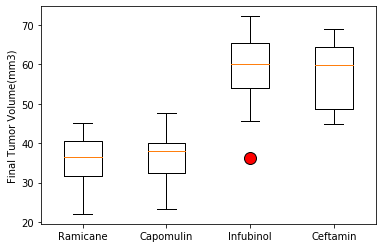

In [20]:
data = [four_promising_volume_list[0], four_promising_volume_list[1],four_promising_volume_list[3],
       four_promising_volume_list[2]]
fig1,ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='black')
bp = ax1.boxplot(data,0, flierprops=flierprops)
ax1.set_xticklabels(['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin'])
ax1.set_ylabel("Final Tumor Volume(mm3)")
plt.show

## Line and Scatter Plots

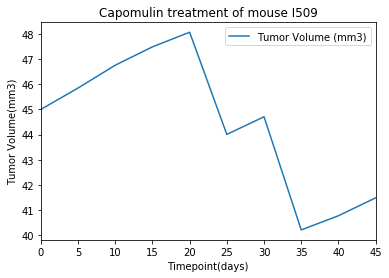

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
new_merge_df = pd.merge(study_results,mouse_metadata)
capomulin_df = new_merge_df.loc[new_merge_df["Drug Regimen"]=="Capomulin",:]
capomulin_df
outlier_df.drop_duplicates(subset ="Mouse ID",keep ="last",inplace = True)
example_capomulin =new_merge_df.iloc[1721,0]
example_capomulin
capomulin_example_df =new_merge_df.loc[new_merge_df["Mouse ID"]== example_capomulin,:]
capomulin_example_df
volume_timepoint = capomulin_example_df[["Timepoint","Tumor Volume (mm3)"]]
volume_timepoint = volume_timepoint.set_index("Timepoint")
volume_timepoint.plot.line()
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()


/Users/heesungshim/app/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


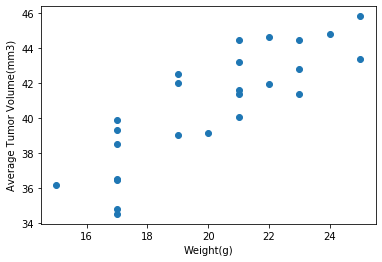

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df
capomulin_df.drop_duplicates(subset ="Mouse ID",keep ="first",inplace = True)
capomulin_ID_list = capomulin_df["Mouse ID"].tolist()
id_volume_list=[]
for id in capomulin_ID_list:
    id_volume =merge_df.loc[merge_df["Mouse ID"]==id,["Tumor Volume (mm3)"]].mean()
    id_volume_list.append(float(id_volume))
capomulin_weight_list = capomulin_df["Weight (g)"].tolist()
plt.scatter(capomulin_weight_list,id_volume_list,marker="o", facecolors="tab:blue")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


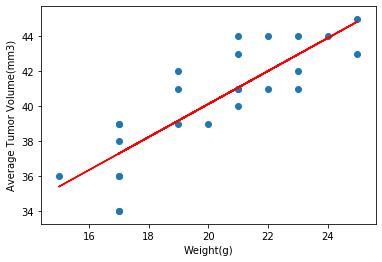

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
new_id_volume_list =[]
for volume in id_volume_list:
    new_id_volume_list.append(int(volume))

Regression_df ={"Capomulin Mouse ID":capomulin_ID_list,'Weight(g)':capomulin_weight_list,
                    'Average Tumor Volume(mm3)':new_id_volume_list}
Capomulin_summary_df = pd.DataFrame(Regression_df,columns=["Capomulin Mouse ID",'Weight(g)','Average Tumor Volume(mm3)'])   
x_values = Capomulin_summary_df["Weight(g)"]
y_values = Capomulin_summary_df["Average Tumor Volume(mm3)"]
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.scatter(x_values,y_values)
#plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()